In [3]:
import matplotlib.pyplot as plt
import numpy as np


x_outer < x_inner
[[0, 0], [0, 1.0], [1.0, 1.0], [1.0, 0.06000000000000005], [0.06000000000000005, 0.06000000000000005], [0.06000000000000005, 0.94], [0.94, 0.94], [0.94, 0.1200000000000001], [0.1200000000000001, 0.1200000000000001], [0.1200000000000001, 0.8799999999999999], [0.8799999999999999, 0.8799999999999999], [0.8799999999999999, 0.18000000000000016], [0.18000000000000016, 0.18000000000000016], [0.18000000000000016, 0.8199999999999998], [0.8199999999999998, 0.8199999999999998], [0.8199999999999998, 0.2400000000000002], [0.2400000000000002, 0.2400000000000002], [0.2400000000000002, 0.7599999999999998], [0.7599999999999998, 0.7599999999999998], [0.7599999999999998, 0.3000000000000002]]


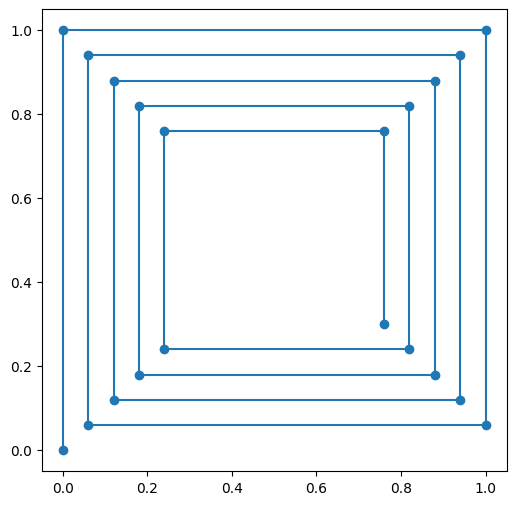

In [18]:
x_inner = 0.5 # x最小
x_outer = 1.0 # x最大
y_inner = 0.5 # y最小
y_outer = 1.0 # y最大
wire_diameter = 0.01 #線徑
num_turns = 10
x_wire_spacing = (x_outer - x_inner)/num_turns + wire_diameter # x方向線圈間距
y_wire_spacing = (y_outer - y_inner)/num_turns + wire_diameter # y方向線圈間距

coil_points = [[0,0]]
for i in range(num_turns):
    coil_points.append([coil_points[-1][0],coil_points[-1][1]+y_outer])
    coil_points.append([coil_points[-1][0]+x_outer,coil_points[-1][1]])
    y_outer -= y_wire_spacing
    coil_points.append([coil_points[-1][0],coil_points[-1][1]-y_outer]) 
    x_outer -= x_wire_spacing
    if x_outer < x_inner:
        print("x_outer < x_inner")
        break
    coil_points.append([coil_points[-1][0]-x_outer,coil_points[-1][1]])
    y_outer -= y_wire_spacing
    x_outer -= x_wire_spacing
    if y_outer < y_inner:
        print("y_outer < y_inner")
        break

print(coil_points)
plt.figure(figsize=(6,6))
coil_points = np.array(coil_points)
plt.plot(coil_points[:,0],coil_points[:,1],marker='o')
